# Previsão com Prophet
Prof. Fernando Amaral

In [52]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet
#conda install -c conda-forge fbprophet

In [53]:
import matplotlib.pyplot as plt

In [54]:
N = 60 
i = 1800 

In [55]:
all_data = pd.read_csv("train_1.csv").T 
key = pd.read_csv("key_1.csv")

In [56]:
train, test = all_data.iloc[0:-N,:], all_data.iloc[-N:,:]
test_cleaned = test.T.fillna(method='ffill').T
train_cleaned = train.T.iloc[:,1:].fillna(method='ffill').T

In [57]:
data=train_cleaned.iloc[:,i].to_frame()
data.columns = ['visits']
data['mean'] = pd.Series(data.visits).rolling(window=50).mean()
std_mult = 1.5
data.ix[np.abs(data.visits-data.visits.mean())>=(std_mult*data.visits.std()),'visits'] = data.ix[np.abs(data.visits-data.visits.mean())>=(std_mult*data.visits.std()),'mean']
data.index = pd.to_datetime(data.index)

C:\Users\webma\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [58]:
data.head()

,visits,mean
2015-07-01,1.0,NaN
2015-07-02,6.0,NaN
2015-07-03,8.0,NaN
2015-07-04,7.0,NaN
2015-07-05,12.0,NaN


In [45]:
X = pd.DataFrame(index=range(0,len(data)))
X['ds'] = data.index
X['y'] = data['visits'].values
X.head()

,ds,y
0,2015-07-01,1.0
1,2015-07-02,6.0
2,2015-07-03,8.0
3,2015-07-04,7.0
4,2015-07-05,12.0


In [46]:
m = Prophet(yearly_seasonality=True)
m.fit(X)
future = m.make_future_dataframe(periods=N)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
545,2016-12-27
546,2016-12-28
547,2016-12-29
548,2016-12-30
549,2016-12-31


In [47]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
545,2016-12-27,7.744459,4.389202,11.367831
546,2016-12-28,7.621471,4.151383,11.216913
547,2016-12-29,8.044821,4.291045,11.596863
548,2016-12-30,8.113781,4.679598,11.831587
549,2016-12-31,9.424044,5.561804,13.295045


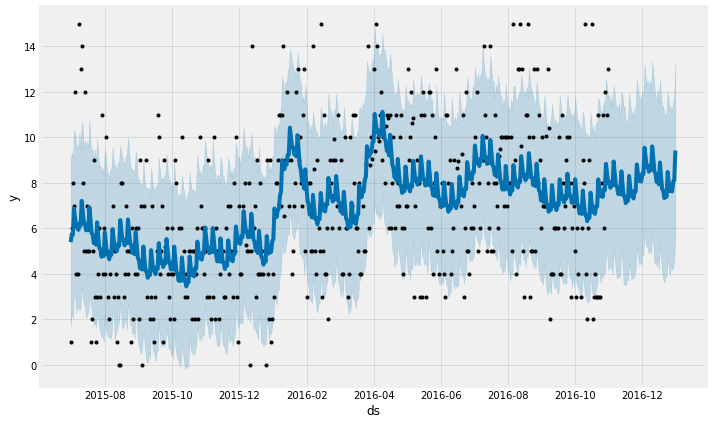

In [48]:
m.plot(forecast);